In [1]:
import tensorflow as tf 

In [10]:
from tensorflow import keras 

In [11]:
import numpy as np

In [3]:
print(tf.__version__)

1.10.0


In [4]:
imdb=keras.datasets.imdb

In [5]:
#keeping 10000 most frequently used word and discarding
#other word to make it manageable in size

In [6]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 4s 0us/step


In [7]:
"Training entries: {}, labels :{}".format(len(train_data),len(train_labels))

'Training entries: 25000, labels :25000'

In [12]:
np.array(train_data[0])

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

In [13]:
len(train_data[0])

218

In [14]:
len(train_data[1])

189

In [15]:
#converting integers into words 

In [16]:
word_index=imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [21]:
# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3


In [24]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [26]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [28]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [34]:
train_data= keras.preprocessing.sequence.pad_sequences(train_data,
                                                       maxlen=256,
                                                       padding='post',
                                                       value=word_index["<PAD>"])

In [35]:
test_data=keras.preprocessing.sequence.pad_sequences(test_data,
                                                    maxlen=256,
                                                    padding='post',
                                                    value=word_index["<PAD>"])

In [36]:
len(train_data[10])

256

In [54]:
#buliding the model
vocab_size=10000
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size,16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16,activation=tf.nn.relu))
model.add(keras.layers.Dense(1,activation=tf.nn.sigmoid))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [55]:
#lost function and optimizer
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [56]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]


In [57]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 41us/step - loss: 0.6953 - acc: 0.5143 - val_loss: 0.6912 - val_acc: 0.5226
Epoch 2/20
15000/15000 [==============================] - 0s 30us/step - loss: 0.6898 - acc: 0.5361 - val_loss: 0.6890 - val_acc: 0.5458
Epoch 3/20
15000/15000 [==============================] - 0s 32us/step - loss: 0.6872 - acc: 0.5679 - val_loss: 0.6865 - val_acc: 0.5789
Epoch 4/20
15000/15000 [==============================] - 0s 32us/step - loss: 0.6844 - acc: 0.6146 - val_loss: 0.6839 - val_acc: 0.6213
Epoch 5/20
15000/15000 [==============================] - 0s 32us/step - loss: 0.6809 - acc: 0.6568 - val_loss: 0.6800 - val_acc: 0.6645
Epoch 6/20
15000/15000 [==============================] - 0s 33us/step - loss: 0.6762 - acc: 0.6860 - val_loss: 0.6752 - val_acc: 0.6924
Epoch 7/20
15000/15000 [==============================] - 0s 32us/step - loss: 0.6701 - acc: 0.6989 - val_loss: 0.6690 - val_acc

In [58]:
results = model.evaluate(test_data, test_labels)

print(results)


25000/25000 [==============================] - 0s 11us/step
[0.402496007604599, 0.84208]


In [59]:
history_dict = history.history
history_dict.keys()


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

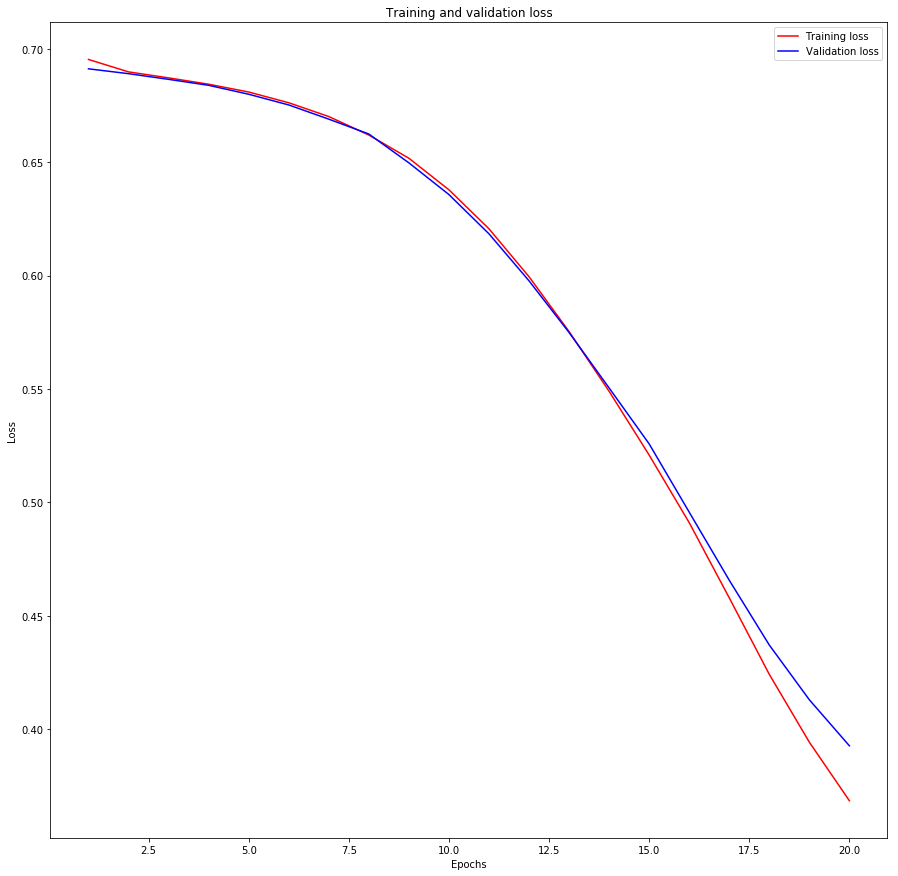

In [60]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss = history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.figure(figsize=(15,15))
plt.plot(epochs,loss,color='red',label='Training loss')
plt.plot(epochs, val_loss, color='blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


<Figure size 432x288 with 0 Axes>

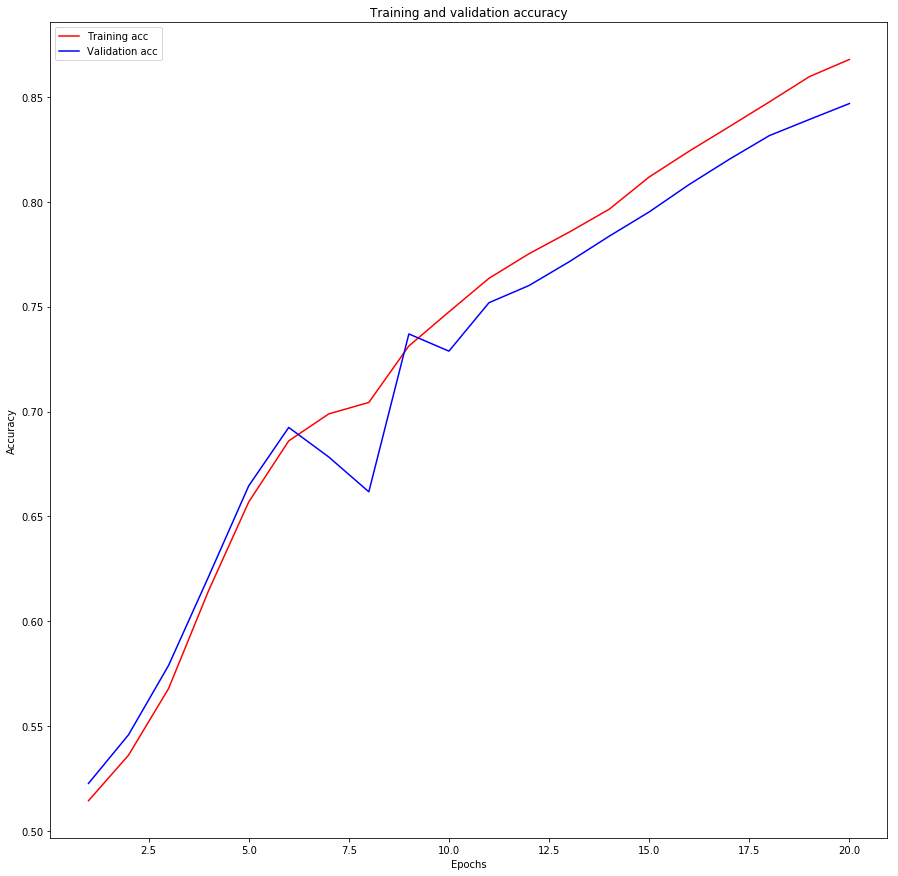

In [61]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.figure(figsize=(15,15))
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()